In [1]:
import torch
from dataset import MultimodalDataset, get_transforms

/home/shved/PythonProjects/final_sprint4/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class Config:
    # для воспроизводимости
    SEED = 42

    # Модели
    TEXT_MODEL_NAME = "albert-base-v1" # "bert-base-uncased"
    IMAGE_MODEL_NAME = "tf_efficientnet_b0"

    # Какие слои размораживаем - совпадают с нэймингом в моделях
    TEXT_MODEL_UNFREEZE = "" # encoder.layer.11|pooler
    IMAGE_MODEL_UNFREEZE = "blocks.6|conv_head|bn2" # 

    # Гиперпараметры
    BATCH_SIZE = 128
    TEXT_LR = 3e-5
    IMAGE_LR = 1e-4
    REGRESSOR_LR = 5e-3
    EPOCHS = 50
    DROPOUT = 0.05
    HIDDEN_DIM = 256
    NUM_CLASSES = 555
    TARGET_MAE = 50

    # Пути
    DF_PATH = "data/dish.csv"
    INGR_DF_PATH = "data/ingredients.csv"
    SAVE_PATH = "best_model.pth"




device = "cuda" if torch.cuda.is_available() else "cpu"
config = Config()

In [3]:
transforms = get_transforms(config=config)
train_dataset = MultimodalDataset(config, transforms)
print('len(train_dataset)=', len(train_dataset))
print(train_dataset.df.head())
train_dataset[1]

len(train_dataset)= 2755
   index          dish_id  total_calories  total_mass  \
0      1  dish_1561662054      419.438782       292.0   
1      3  dish_1560455030       20.590000       103.0   
2      4  dish_1558372433       74.360001       143.0   
3      5  dish_1565640549       45.482903       139.0   
4      6  dish_1563207364      309.269989       271.0   

                                         ingredients  split  \
0  ingr_0000000312;ingr_0000000026;ingr_000000002...  train   
1    ingr_0000000471;ingr_0000000031;ingr_0000000347  train   
2                                    ingr_0000000453  train   
3  ingr_0000000032;ingr_0000000523;ingr_000000016...  train   
4  ingr_0000000008;ingr_0000000192;ingr_000000044...  train   

                                                text  \
0  pepper,white rice,mixed greens,garlic,soy sauc...   
1             cherry tomatoes,cucumbers,baby carrots   
2                                         deprecated   
3  tomatoes,cilantro,olive oi

{'target': 20.59,
 'image': tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
 

In [4]:
train_dataset.df_ingr.head()

,ingr
id,
1,cottage cheese
2,strawberries
3,garden salad
4,bacon
5,potatoes


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6399999].


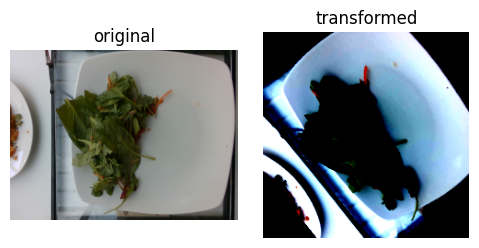

{'target': 67.877647,
 'text': 'tomatoes,vinegar,spinach (raw),mustard,olive oil,cucumbers,mustard greens,garlic,salt',
 'mass': 60.0,
 'text_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [5]:
from dataset import plot_image

row = train_dataset[len(train_dataset) - 1]
plot_image(row.pop('source_image'), row.pop('image'))
row


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6399999].


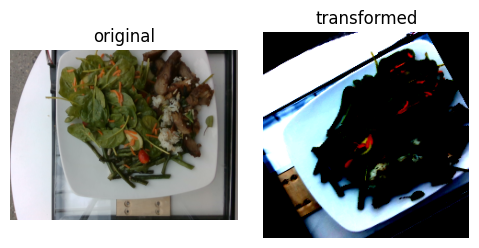

{'target': 419.438782,
 'text': 'pepper,white rice,mixed greens,garlic,soy sauce,millet,lemon juice,bok choy,olive oil,onions,vinegar,green beans,pork,apple,sugar,salt,parsley',
 'mass': 292.0,
 'text_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,

In [6]:
row = train_dataset[0]
plot_image(row.pop('source_image'), row.pop('image'))
row

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6051416].


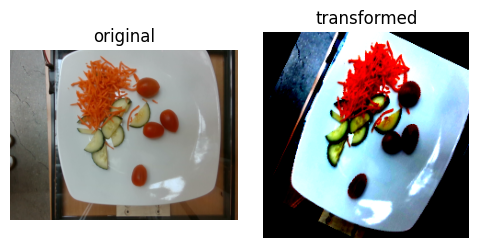

{'target': 20.59,
 'text': 'cherry tomatoes,cucumbers,baby carrots',
 'mass': 103.0,
 'text_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [7]:
row = train_dataset[1]
plot_image(row.pop('source_image'), row.pop('image'))
row

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.7859695].


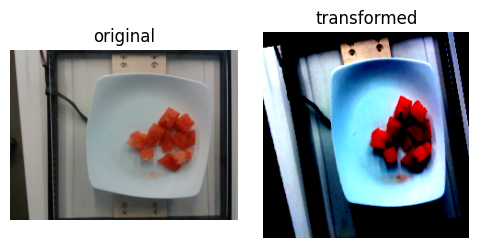

{'target': 20.400002,
 'text': 'deprecated',
 'mass': 68.0,
 'text_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0

In [8]:
row = train_dataset[100]
plot_image(row.pop('source_image'), row.pop('image'))
row


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6399999].


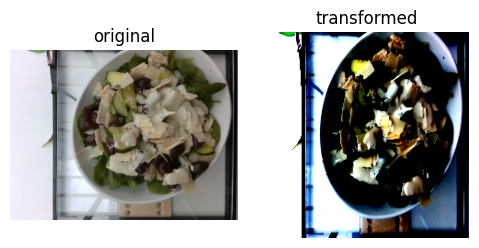

{'target': 560.658997,
 'text': 'cucumbers,spinach (raw),parmesan cheese,caesar dressing,chicken,olives',
 'mass': 522.0,
 'text_ids': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
 

In [9]:
row = train_dataset[250]
plot_image(row.pop('source_image'), row.pop('image'))
row


In [10]:
from utils import train
train(config, device,)

Разморожен слой: blocks.6.0.conv_pw.weight
Разморожен слой: blocks.6.0.bn1.weight
Разморожен слой: blocks.6.0.bn1.bias
Разморожен слой: blocks.6.0.conv_dw.weight
Разморожен слой: blocks.6.0.bn2.weight
Разморожен слой: blocks.6.0.bn2.bias
Разморожен слой: blocks.6.0.se.conv_reduce.weight
Разморожен слой: blocks.6.0.se.conv_reduce.bias
Разморожен слой: blocks.6.0.se.conv_expand.weight
Разморожен слой: blocks.6.0.se.conv_expand.bias
Разморожен слой: blocks.6.0.conv_pwl.weight
Разморожен слой: blocks.6.0.bn3.weight
Разморожен слой: blocks.6.0.bn3.bias
Разморожен слой: conv_head.weight
Разморожен слой: bn2.weight
Разморожен слой: bn2.bias
training started
2026-01-11 19:34:38.911266 Epoch 0/49 | avg_Loss: 144.6343 | Train MAE: 145.4868| Val MAE: 105.8859
Save best model, epoch: 0
2026-01-11 19:37:00.268827 Epoch 1/49 | avg_Loss: 94.9021 | Train MAE: 95.1420| Val MAE: 91.6717
Save best model, epoch: 1
2026-01-11 19:39:21.566493 Epoch 2/49 | avg_Loss: 83.5570 | Train MAE: 84.0152| Val MAE: 84.

In [11]:
from utils import MultimodalModel
val_model = MultimodalModel(config)
val_model.load_state_dict(torch.load(config.SAVE_PATH, weights_only=True))

<All keys matched successfully>

In [12]:

from functools import partial
from torch.utils.data import DataLoader
from transformers import AutoModel, AutoTokenizer
from utils import collate_fn

tokenizer = AutoTokenizer.from_pretrained(config.TEXT_MODEL_NAME)
val_transforms = get_transforms(config, ds_type="val")
val_dataset = MultimodalDataset(config, val_transforms, ds_type="test",)
val_loader = DataLoader(val_dataset,
                        batch_size=1,
                        shuffle=False,
                        collate_fn=partial(collate_fn,
                                            tokenizer=tokenizer))


In [62]:

import torchmetrics

mae_vals  = []
val_model.eval()
metric = torchmetrics.MeanAbsoluteError().to(device)
metric.reset()
with torch.no_grad():
    for i, batch in enumerate(val_loader):
        inputs = val_model.get_inputs(batch, device)
        targets = batch['target'].unsqueeze(1).to(device)

        predicts = val_model(**inputs)
        mae_val = metric(preds=predicts, target=targets)
        mae_vals.append({"id": i, "predict":predicts.cpu().item(), "target": targets.cpu().item(), "error":abs(targets.cpu().item() - predicts.cpu().item()), "mass": inputs["mass"].cpu().item()})

val_mae = metric.compute().cpu().numpy()
print("Validate MAE = {val}", val_mae)

Validate MAE = {val} 49.628952


In [63]:

mae_vals.sort(key=lambda x: x["error"], reverse=True)
print("len =", len(mae_vals))
ae = 0
for m in mae_vals:
    print(f"id={m['id']}, error={m['error']:.4f}") 
    ae += m['error']
print(f"mae = {ae/len(mae_vals):.4f}")

len = 507
id=141, error=448.3428
id=423, error=372.2849
id=479, error=367.1886
id=95, error=340.1035
id=171, error=313.7867
id=5, error=306.3467
id=54, error=300.8160
id=13, error=277.4997
id=170, error=277.4625
id=76, error=267.3143
id=86, error=264.3724
id=298, error=253.7431
id=428, error=246.4492
id=221, error=243.6704
id=105, error=240.1725
id=67, error=239.8729
id=57, error=236.4399
id=401, error=210.5155
id=87, error=204.0745
id=326, error=198.2954
id=194, error=195.6805
id=72, error=188.2862
id=244, error=185.6482
id=459, error=185.0839
id=302, error=180.3871
id=400, error=175.5489
id=80, error=174.6379
id=79, error=157.3081
id=313, error=157.2340
id=108, error=152.6670
id=38, error=150.0422
id=260, error=149.2320
id=25, error=144.8447
id=94, error=143.2224
id=177, error=141.6553
id=276, error=137.5884
id=358, error=134.6624
id=216, error=132.7632
id=6, error=131.3153
id=482, error=130.8250
id=238, error=129.2544
id=88, error=128.0861
id=180, error=126.7102
id=127, error=125.93

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6399999].


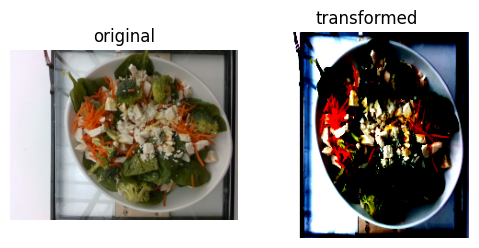

ingredients = carrot,goat cheese,olive oil,broccoli,spinach (raw),chicken
mass = 416.00, calories = 902.20, abs error=448.342834


In [65]:
row = val_dataset[mae_vals[0]["id"]]
plot_image(row.pop('source_image'), row.pop('image'))
print(f'ingredients = {row["text"]}')
print(f'mass = {mae_vals[0]["mass"]:.2f}, calories = {mae_vals[0]["target"]:.2f}, abs error={mae_vals[0]["error"]:2f}')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.5942483].


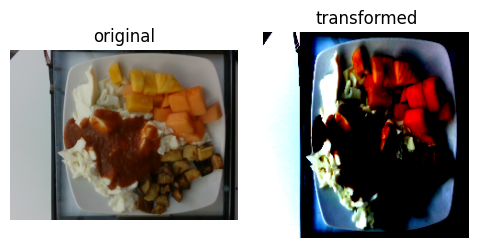

'egg whites,olive oil,salsa,cantaloupe,sweet potato,pineapple'

In [ ]:
row = val_dataset[mae_vals[1]["id"]]
plot_image(row.pop('source_image'), row.pop('image'))
print(f'ingredients = {row["text"]}')
print(f'mass = {mae_vals[1]["mass"]:.2f}, calories = {mae_vals[1]["target"]:.2f}, abs error={mae_vals[1]["error"]:2f}')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..2.5005665].


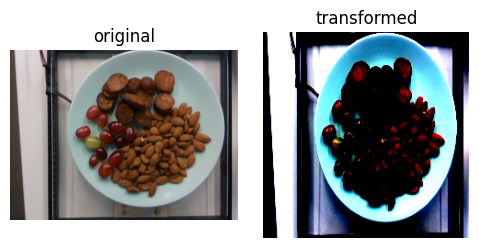

ingredients = almonds,sausage,grapes
mass = 277.00, calories = 1050.51, abs error=367.188599


In [67]:
row = val_dataset[mae_vals[2]["id"]]
plot_image(row.pop('source_image'), row.pop('image'))
print(f'ingredients = {row["text"]}')
print(f'mass = {mae_vals[2]["mass"]:.2f}, calories = {mae_vals[2]["target"]:.2f}, abs error={mae_vals[2]["error"]:2f}')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.5768192].


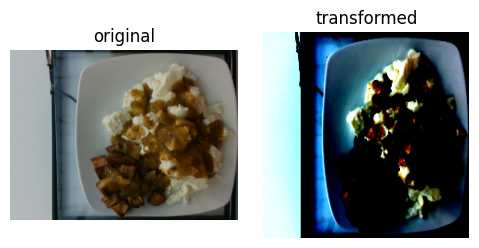

ingredients = sweet potato,egg whites,olive oil,salsa
mass = 819.00, calories = 448.38, abs error=340.103455


In [68]:
row = val_dataset[mae_vals[3]["id"]]
plot_image(row.pop('source_image'), row.pop('image'))
print(f'ingredients = {row["text"]}')
print(f'mass = {mae_vals[3]["mass"]:.2f}, calories = {mae_vals[3]["target"]:.2f}, abs error={mae_vals[3]["error"]:2f}')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.8556863].


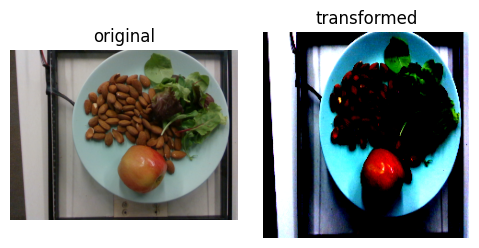

ingredients = apple,garden salad,almonds
mass = 269.00, calories = 751.54, abs error=313.786682


In [69]:
row = val_dataset[mae_vals[4]["id"]]
plot_image(row.pop('source_image'), row.pop('image'))
print(f'ingredients = {row["text"]}')
print(f'mass = {mae_vals[4]["mass"]:.2f}, calories = {mae_vals[4]["target"]:.2f}, abs error={mae_vals[4]["error"]:2f}')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.1345534].


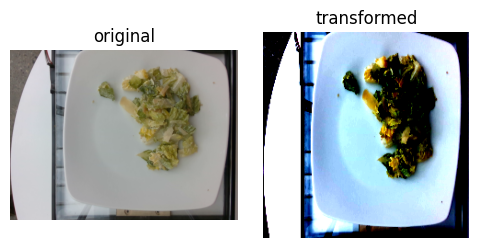

ingredients = caesar salad
mass = 75.00, calories = 33.00, abs error=0.002766


In [70]:
row = val_dataset[mae_vals[-1]["id"]]
plot_image(row.pop('source_image'), row.pop('image'))
print(f'ingredients = {row["text"]}')
print(f'mass = {mae_vals[-1]["mass"]:.2f}, calories = {mae_vals[-1]["target"]:.2f}, abs error={mae_vals[-1]["error"]:2f}')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.9428322].


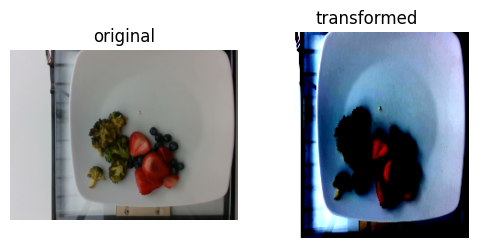

ingredients = broccoli,olive oil,berries
mass = 122.00, calories = 69.06, abs error=0.253738


In [71]:
row = val_dataset[mae_vals[-2]["id"]]
plot_image(row.pop('source_image'), row.pop('image'))
print(f'ingredients = {row["text"]}')
print(f'mass = {mae_vals[-2]["mass"]:.2f}, calories = {mae_vals[-2]["target"]:.2f}, abs error={mae_vals[-2]["error"]:2f}')